today first of all go to kaggle dataset and pick any dataset

i decide load application and transaction: fraud Detection

* first of all mojy file load karvani hai yaha par 

In [5]:
import pandas as pd
df = pd.read_csv(r"E:\Programming Data by Adeel\Python\Python course by EXD\Classes\class 21(14-06-25)\files\transactions.csv")

# Top 5 rows dekhne ke liye
print(df.head())

                         transaction_id customer_id     transaction_date  \
0  2d7ddfd4-1112-4354-a2dd-fad94b45a850  CUST102188  2022-01-04 11:27:00   
1  ba998721-a612-4e0a-8354-46d001e9c39c  CUST107144  2022-01-03 23:52:00   
2  0b4ad8e2-40ac-49c9-b59a-c9efaaccc7a6  CUST102126  2022-01-15 06:54:00   
3  c4fce988-34c5-48db-8686-bfad0b3bc0b5  CUST109887  2022-01-08 07:57:00   
4  f9b8ca30-00e5-4322-8cff-eac0554cf2da  CUST108620  2022-01-02 10:43:00   

    transaction_type  transaction_amount merchant_category  \
0       Bill Payment              2100.0            Dining   
1                UPI              1400.0            Travel   
2         Debit Card              1000.0     Entertainment   
3        Credit Card             10500.0         Utilities   
4  Loan Disbursement              8100.0       Electronics   

                   merchant_name          transaction_location  \
0       Rattan, Khanna and Magar  Srikakulam, Himachal Pradesh   
1                    Chauhan LLC      

In [6]:
print(df.head())         # Top 5 rows
print(df.shape)          # Rows x Columns
print(df.columns)        # Column names
print(df.info())         # Data types + null values
print(df.describe())     # Statistical summary (only for numbers)


                         transaction_id customer_id     transaction_date  \
0  2d7ddfd4-1112-4354-a2dd-fad94b45a850  CUST102188  2022-01-04 11:27:00   
1  ba998721-a612-4e0a-8354-46d001e9c39c  CUST107144  2022-01-03 23:52:00   
2  0b4ad8e2-40ac-49c9-b59a-c9efaaccc7a6  CUST102126  2022-01-15 06:54:00   
3  c4fce988-34c5-48db-8686-bfad0b3bc0b5  CUST109887  2022-01-08 07:57:00   
4  f9b8ca30-00e5-4322-8cff-eac0554cf2da  CUST108620  2022-01-02 10:43:00   

    transaction_type  transaction_amount merchant_category  \
0       Bill Payment              2100.0            Dining   
1                UPI              1400.0            Travel   
2         Debit Card              1000.0     Entertainment   
3        Credit Card             10500.0         Utilities   
4  Loan Disbursement              8100.0       Electronics   

                   merchant_name          transaction_location  \
0       Rattan, Khanna and Magar  Srikakulam, Himachal Pradesh   
1                    Chauhan LLC      

In [8]:
# check missing values
print(df.isnull().sum())

transaction_id                       0
customer_id                          0
transaction_date                     0
transaction_type                     0
transaction_amount                   0
merchant_category                    0
merchant_name                        0
transaction_location                 0
account_balance_after_transaction    0
is_international_transaction         0
device_used                          0
ip_address                           0
transaction_status                   0
transaction_source_destination       0
transaction_notes                    0
fraud_flag                           0
dtype: int64


In [10]:
df = df.dropna()


In [11]:
print(df.isnull().sum())

transaction_id                       0
customer_id                          0
transaction_date                     0
transaction_type                     0
transaction_amount                   0
merchant_category                    0
merchant_name                        0
transaction_location                 0
account_balance_after_transaction    0
is_international_transaction         0
device_used                          0
ip_address                           0
transaction_status                   0
transaction_source_destination       0
transaction_notes                    0
fraud_flag                           0
dtype: int64


In [13]:
df.describe()

,transaction_amount,account_balance_after_transaction,is_international_transaction,fraud_flag
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,5005.674329,21930.235669,0.010440,0.010040
std,5070.810305,14621.954095,0.101643,0.099697
min,100.000000,0.000000,0.000000,0.000000
25%,1400.000000,9237.000000,0.000000,0.000000
50%,3461.505910,21586.500000,0.000000,0.000000
75%,6900.000000,33994.250000,0.000000,0.000000
max,76531.610223,89097.000000,1.000000,1.000000


In [21]:
df.columns

Index(['transaction_id', 'customer_id', 'transaction_date', 'transaction_type',
       'transaction_amount', 'merchant_category', 'merchant_name',
       'transaction_location', 'account_balance_after_transaction',
       'is_international_transaction', 'device_used', 'ip_address',
       'transaction_status', 'transaction_source_destination',
       'transaction_notes', 'fraud_flag'],
      dtype='object')

In [ ]:
# Data cleaning 

## 1) Total Transactions aur Fraudulent Transactions

In [14]:
print("Total Transactions:", df.shape[0])
print("Total Fraudulent Transactions:", df[df['fraud_flag'] == 1].shape[0])
print("Percentage Fraudulent:", (df['fraud_flag'].mean() * 100), "%")


Total Transactions: 50000
Total Fraudulent Transactions: 502
Percentage Fraudulent: 1.004 %


## Fraud by Transaction Type'

In [15]:
print(df['transaction_type'].value_counts())
print(df[df['fraud_flag'] == 1]['transaction_type'].value_counts())


transaction_type
Debit Card           5088
Loan Disbursement    5056
ATM Withdrawal       5042
EMI Payment          5031
Fund Transfer        5025
Credit Card          5007
Bill Payment         4975
Deposit              4966
UPI                  4919
Net Banking          4891
Name: count, dtype: int64
transaction_type
UPI                  60
EMI Payment          56
Loan Disbursement    51
Net Banking          50
Deposit              49
Fund Transfer        49
ATM Withdrawal       48
Credit Card          48
Bill Payment         46
Debit Card           45
Name: count, dtype: int64


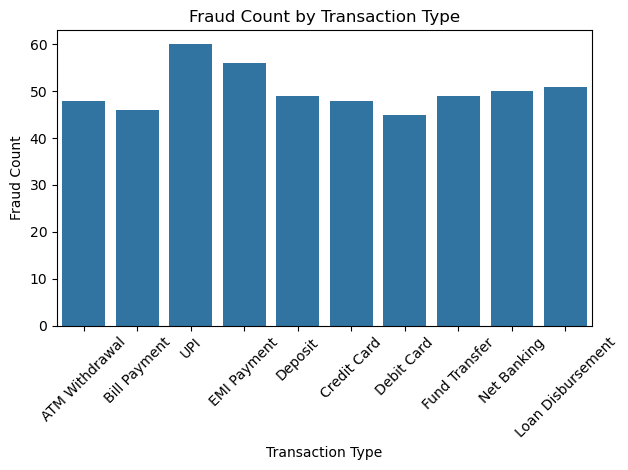

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data=df[df['fraud_flag'] == 1], x='transaction_type')
plt.title("Fraud Count by Transaction Type")
plt.xlabel("Transaction Type")
plt.ylabel("Fraud Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Fraud by Device Used

In [16]:
print(df['device_used'].value_counts())
print(df[df['fraud_flag'] == 1]['device_used'].value_counts())


device_used
ATM       12695
Mobile    12555
Web       12538
POS       12212
Name: count, dtype: int64
device_used
POS       129
Mobile    126
Web       124
ATM       123
Name: count, dtype: int64


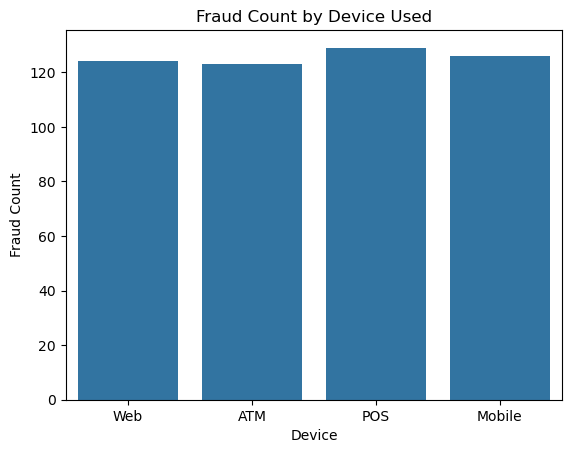

In [24]:
sns.countplot(data=df[df['fraud_flag'] == 1], x='device_used')
plt.title("Fraud Count by Device Used")
plt.xlabel("Device")
plt.ylabel("Fraud Count")
plt.show()


## Fraud by Transaction Amount (high value frauds)

C:\Users\AdeelRock\AppData\Local\Temp\ipykernel_17132\1151732530.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_desc.index, y=fraud_desc['transaction_amount'], palette="Blues_d")


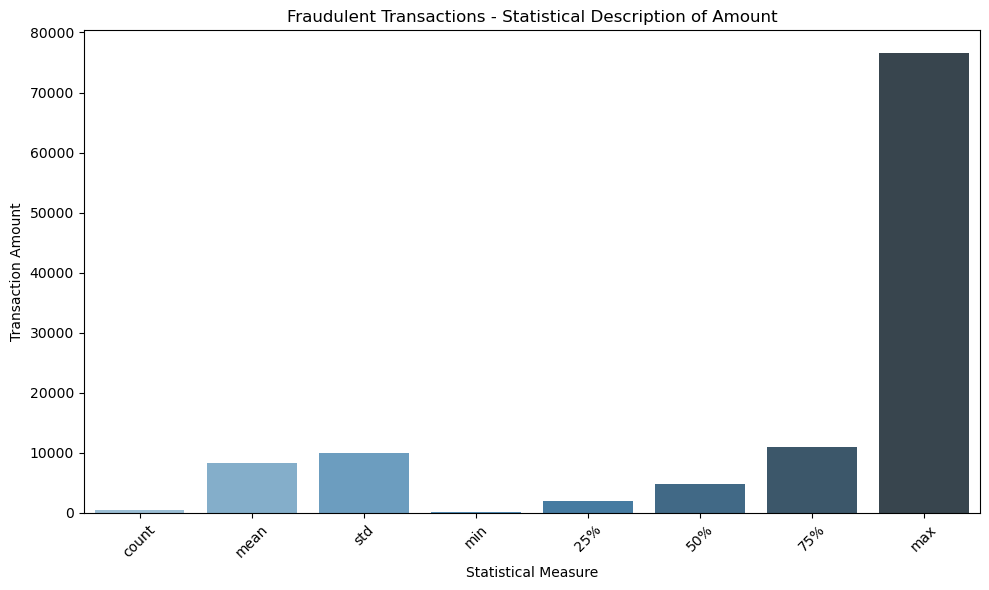

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load your dataset
df = pd.read_csv(r"E:\Programming Data by Adeel\Python\Python course by EXD\Classes\class 21(14-06-25)\files\transactions.csv")  # Update path as needed

# Step 2: Filter only fraud transactions
fraud_data = df[df['fraud_flag'] == 1]

# Step 3: Get description stats
fraud_desc = fraud_data[['transaction_amount']].describe()

# Step 4: Plot the stats
plt.figure(figsize=(10, 6))
sns.barplot(x=fraud_desc.index, y=fraud_desc['transaction_amount'], palette="Blues_d")

plt.title("Fraudulent Transactions - Statistical Description of Amount")
plt.ylabel("Transaction Amount")
plt.xlabel("Statistical Measure")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##  International vs Local Fraud

In [18]:
print(df['is_international_transaction'].value_counts())
print(df[df['fraud_flag'] == 1]['is_international_transaction'].value_counts())


is_international_transaction
0    49478
1      522
Name: count, dtype: int64
is_international_transaction
0    498
1      4
Name: count, dtype: int64


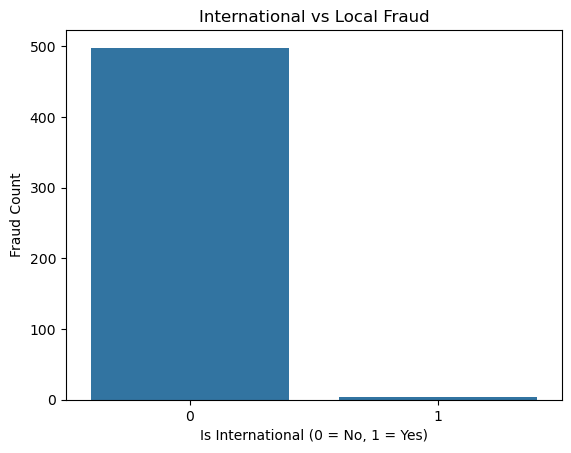

In [26]:
sns.countplot(data=df[df['fraud_flag'] == 1], x='is_international_transaction')
plt.title("International vs Local Fraud")
plt.xlabel("Is International (0 = No, 1 = Yes)")
plt.ylabel("Fraud Count")
plt.show()


## Fraud by Time 

In [19]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

# Fraud count by day
print(df[df['fraud_flag'] == 1]['transaction_date'].dt.date.value_counts().head())

# Fraud by hour
print(df[df['fraud_flag'] == 1]['transaction_date'].dt.hour.value_counts().head())


transaction_date
2022-01-25    23
2022-01-03    23
2022-01-30    22
2022-01-09    21
2022-01-16    21
Name: count, dtype: int64
transaction_date
12    30
16    28
9     28
14    28
2     28
Name: count, dtype: int64


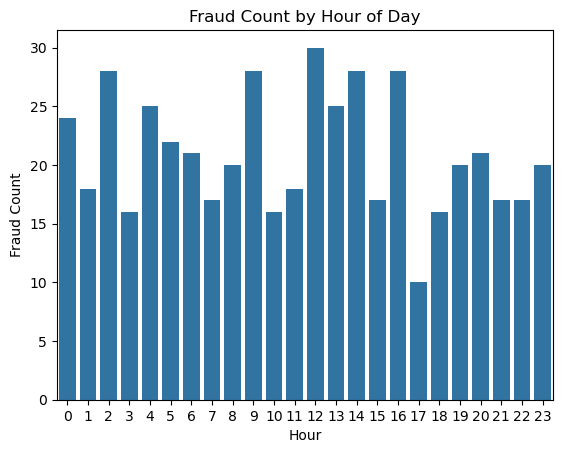

In [25]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df['hour'] = df['transaction_date'].dt.hour

sns.countplot(data=df[df['fraud_flag'] == 1], x='hour')
plt.title("Fraud Count by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Fraud Count")
plt.show()


pie chart jab mojy percentage dehkni ho 

<Axes: ylabel='count'>

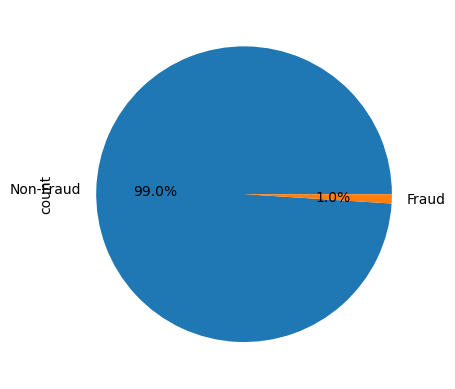

In [31]:
df['fraud_flag'].value_counts().plot.pie(autopct="%1.1f%%", labels=["Non-Fraud", "Fraud"])


**Histogram**
 Jab numeric value ki frequency dikhani ho (jaise transaction_amount)

<Axes: xlabel='transaction_amount', ylabel='Count'>

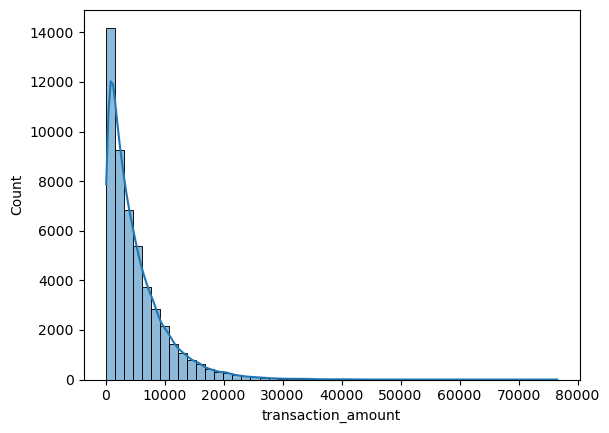

In [32]:
sns.histplot(df['transaction_amount'], bins=50, kde=True)


4. Box Plot
* Jab distribution aur outliers dekhne ho (jaise fraud wale transaction_amount kitne vary karte hain)

<Axes: xlabel='fraud_flag', ylabel='transaction_amount'>

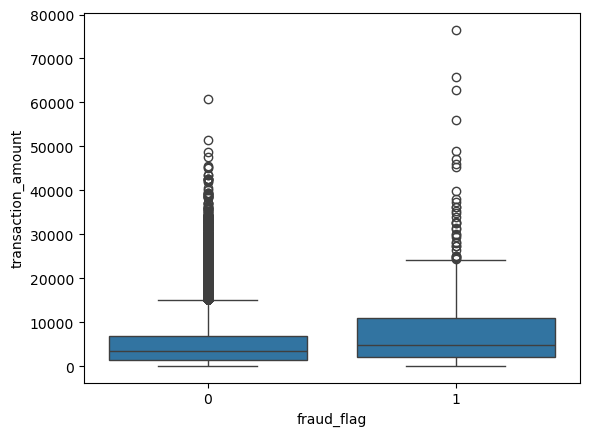

In [33]:
sns.boxplot(x='fraud_flag', y='transaction_amount', data=df)


5. Heatmap
* Jab multiple columns ke relationships samajhne ho (jaise correlation between columns)

In [35]:
# sns.heatmap(df.corr(), annot=True, cmap="coolwarm")


6. Line Plot
* Jab time-based data ho (jaise daily fraud count)

<Axes: xlabel='transaction_date'>

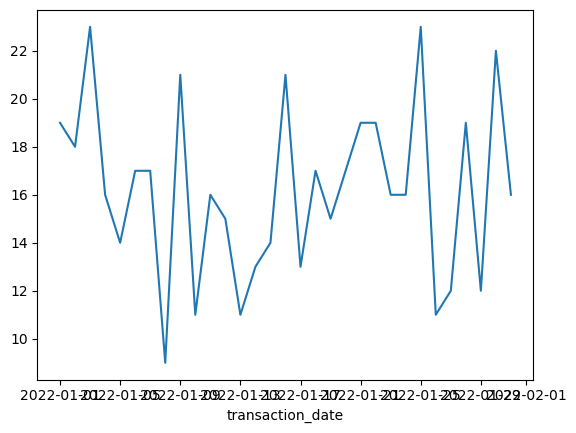

In [36]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df.groupby(df['transaction_date'].dt.date)['fraud_flag'].sum().plot(kind='line')


7. Scatter Plot
* Jab do numeric values ke beech relation dikhana ho

<Axes: xlabel='transaction_amount', ylabel='account_balance_after_transaction'>

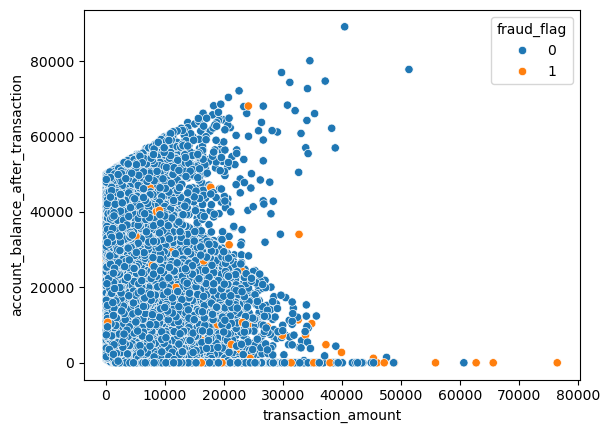

In [37]:
sns.scatterplot(x='transaction_amount', y='account_balance_after_transaction', hue='fraud_flag', data=df)


C:\Users\AdeelRock\AppData\Local\Temp\ipykernel_17132\1600542387.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['fraud_flag'] == 1], x='device_used',
C:\Users\AdeelRock\AppData\Local\Temp\ipykernel_17132\1600542387.py:18: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.countplot(data=df[df['fraud_flag'] == 1], x='device_used',
C:\Users\AdeelRock\AppData\Local\Temp\ipykernel_17132\1600542387.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['fraud_flag'] == 1], x='transaction_type',
C:\Users\AdeelRock\AppData\Local\Temp\ipykernel_17132\1600542387.py:58: FutureWarning: 

Passing `palette` without assigning

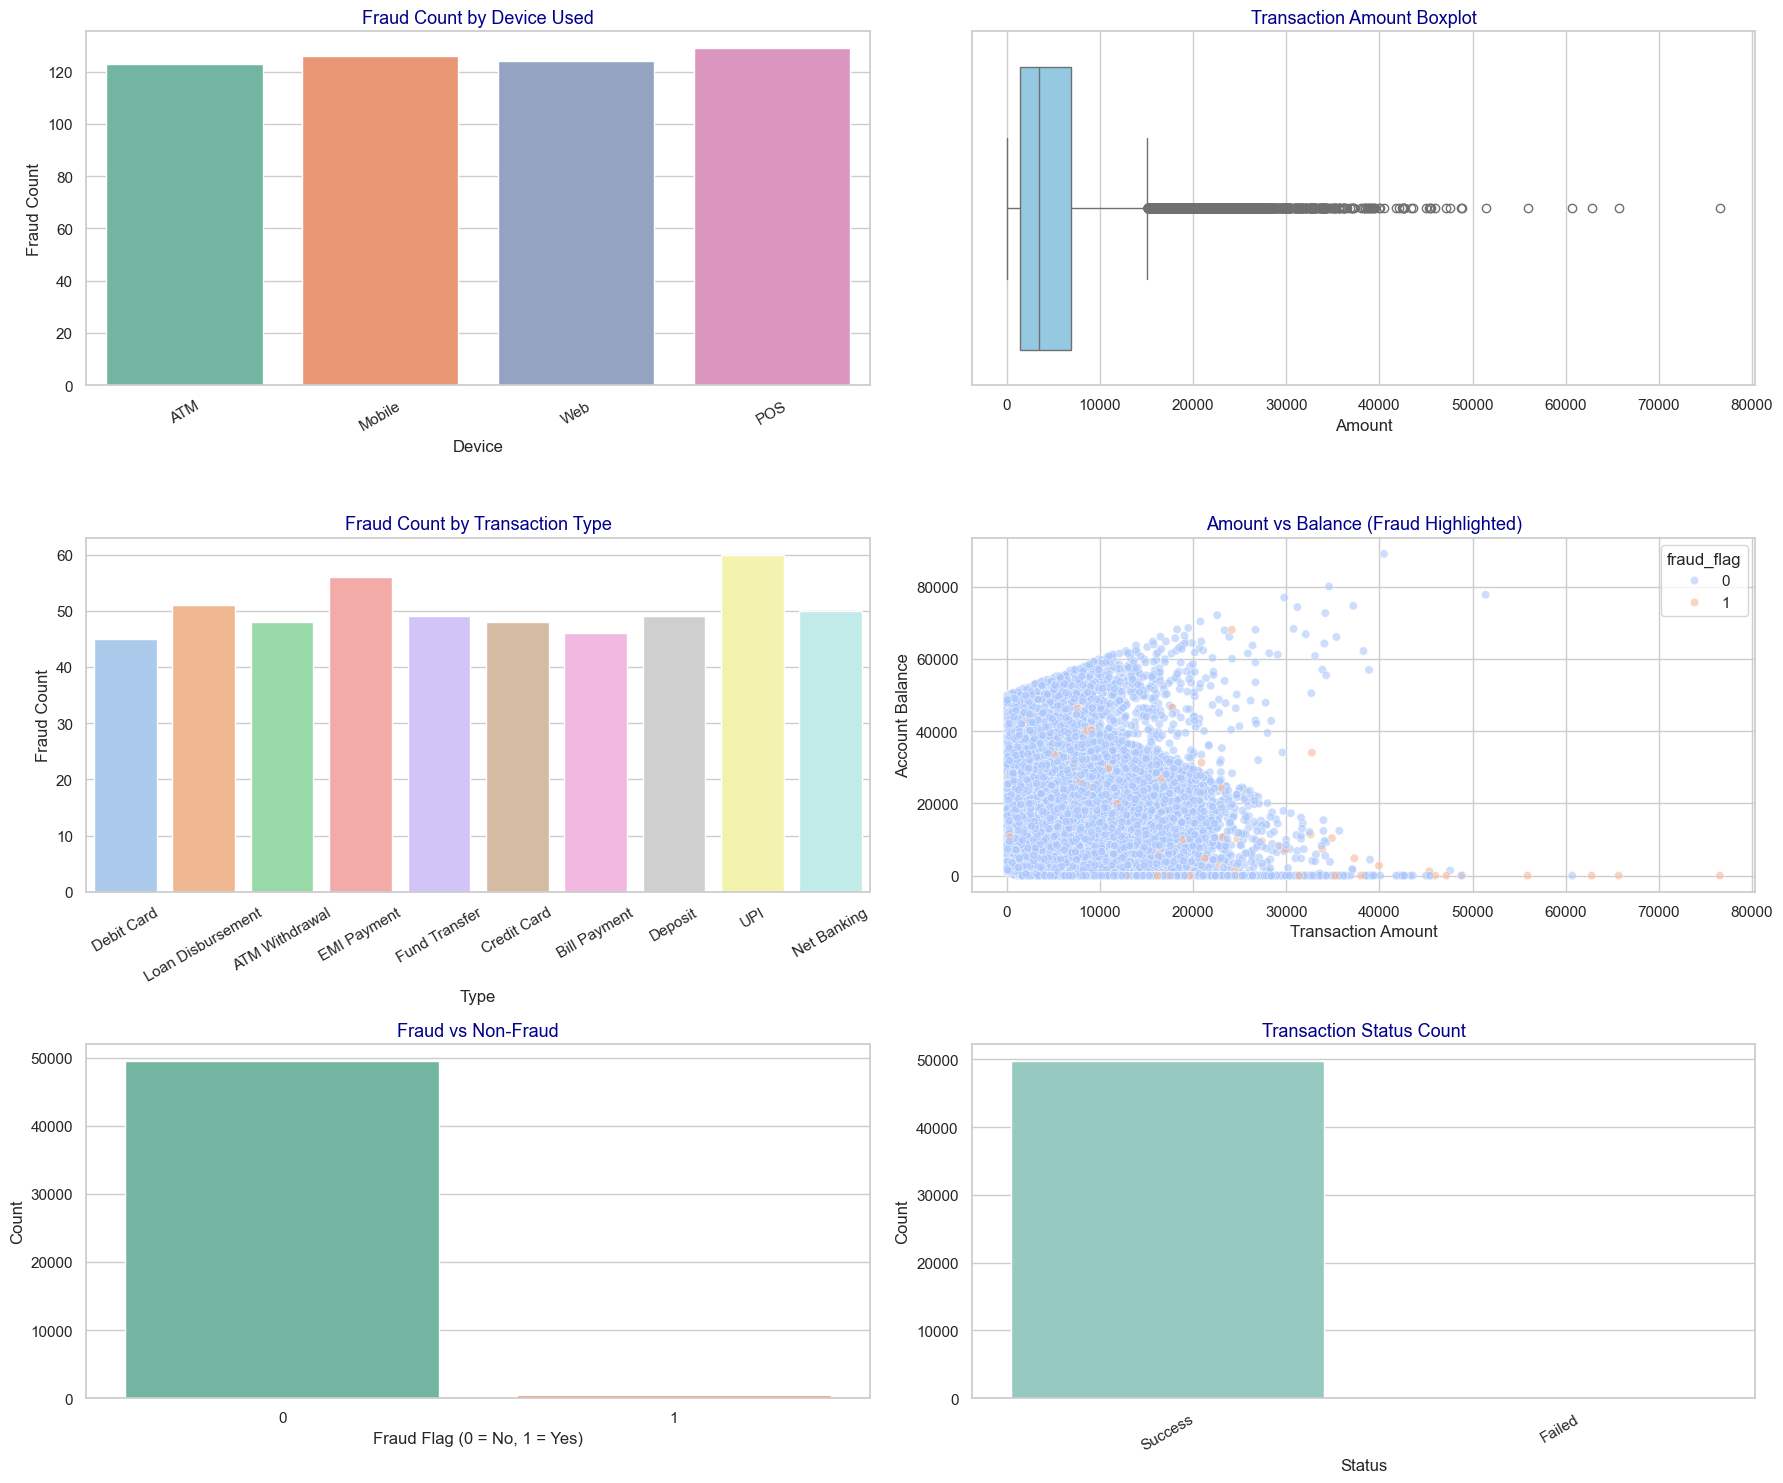

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set theme and figure size
sns.set_theme(style="whitegrid")
plt.figure(figsize=(18, 15))
plt.__name__='Grapic desiner'

# Custom color palettes
color_device = sns.color_palette("Set2")
color_box = "#88ccee"
color_type = sns.color_palette("pastel")
color_fraud = ["#66c2a5", "#fc8d62"]
color_status = sns.color_palette("Set3")

# ===== Subplot 1: Fraud Count by Device =====
plt.subplot(3, 2, 1)
sns.countplot(data=df[df['fraud_flag'] == 1], x='device_used', 
              order=df['device_used'].value_counts().index,
              palette=color_device)
plt.title("Fraud Count by Device Used", fontsize=13, color="darkblue")
plt.xlabel("Device")
plt.ylabel("Fraud Count")
plt.xticks(rotation=30)

# ===== Subplot 2: Boxplot of Transaction Amount =====
plt.subplot(3, 2, 2)
sns.boxplot(x=df['transaction_amount'], color=color_box)
plt.title("Transaction Amount Boxplot", fontsize=13, color="darkblue")
plt.xlabel("Amount")

# ===== Subplot 3: Fraud by Transaction Type =====
plt.subplot(3, 2, 3)
sns.countplot(data=df[df['fraud_flag'] == 1], x='transaction_type', 
              order=df['transaction_type'].value_counts().index,
              palette=color_type)
plt.title("Fraud Count by Transaction Type", fontsize=13, color="darkblue")
plt.xlabel("Type")
plt.ylabel("Fraud Count")
plt.xticks(rotation=30)

# ===== Subplot 4: Scatter Plot: Amount vs Balance =====
plt.subplot(3, 2, 4)
sns.scatterplot(
    x='transaction_amount',
    y='account_balance_after_transaction',
    hue='fraud_flag',
    data=df,
    alpha=0.6,
    palette="coolwarm"
)
plt.title("Amount vs Balance (Fraud Highlighted)", fontsize=13, color="darkblue")
plt.xlabel("Transaction Amount")
plt.ylabel("Account Balance")

# ===== Subplot 5: Fraud vs Non-Fraud Count =====
plt.subplot(3, 2, 5)
sns.countplot(x='fraud_flag', data=df, palette=color_fraud)
plt.title("Fraud vs Non-Fraud", fontsize=13, color="darkblue")
plt.xlabel("Fraud Flag (0 = No, 1 = Yes)")
plt.ylabel("Count")

# ===== Subplot 6: Transaction Status Count =====
plt.subplot(3, 2, 6)
sns.countplot(x='transaction_status', data=df, 
              order=df['transaction_status'].value_counts().index,
              palette=color_status)
plt.title("Transaction Status Count", fontsize=13, color="darkblue")
plt.xlabel("Status")
plt.ylabel("Count")
plt.xticks(rotation=30)

# Final layout adjustment
plt.tight_layout()
plt.show()


In [40]:
from sklearn.model_selection import train_test_split

# X = features (inputs), y = target column
X = df.drop('fraud_flag', axis=1)
y = df['fraud_flag']

# Split: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)


(40000, 15)
(10000, 15)


In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib

# Step 1: Load data
df = pd.read_csv(r"E:\Programming Data by Adeel\Python\Python course by EXD\Classes\class 21(14-06-25)\files\transactions.csv")

# Step 2: Drop high-cardinality or unnecessary columns
df = df.drop(['transaction_id', 'customer_id', 'merchant_name', 'ip_address', 'transaction_notes'], axis=1)

# Step 3: Label Encoding for categorical columns
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Step 4: Split features and target
X = df.drop('fraud_flag', axis=1)
y = df['fraud_flag']

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 7: Evaluate model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Step 8: Save model
joblib.dump(model, "fraud_rf_model.pkl")
print("Model saved as fraud_rf_model.pkl")


Accuracy: 0.9949
Model saved as fraud_rf_model.pkl
